In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("Generated_Clustering_Dataset.csv")

In [ ]:
data.shape

(302, 6)

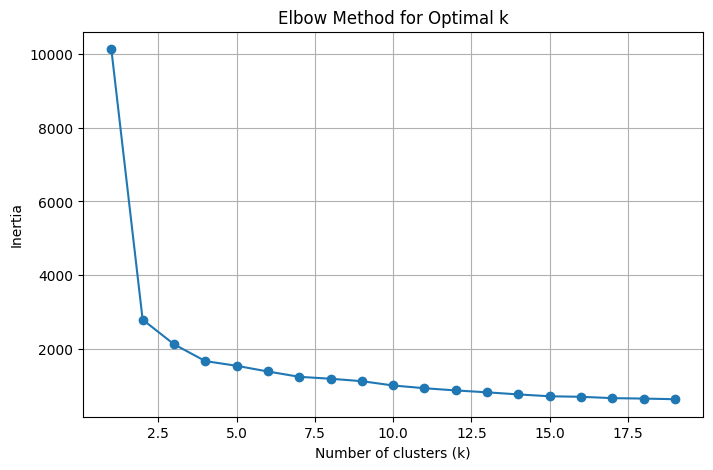

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


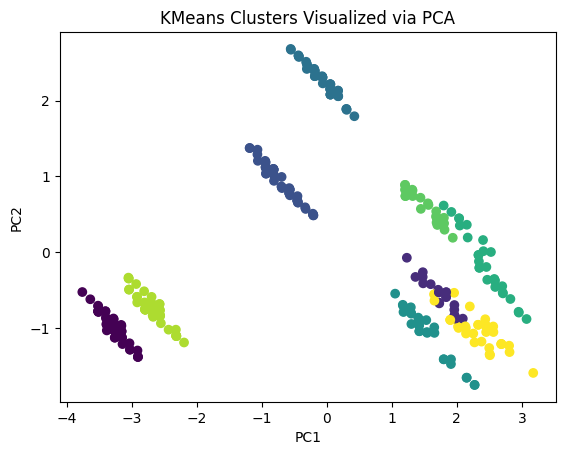

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Step 2: Apply KMeans
kmeans = KMeans(n_clusters=9, random_state=42)
pseudo_labels = kmeans.fit_predict(X_scaled)

# Now you can optionally analyze or use these labels as targets
data['pseudo_label'] = pseudo_labels

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pseudo_labels, cmap='viridis')
plt.title("KMeans Clusters Visualized via PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Data Augmentation

In [ ]:
import numpy as np

def add_noise(X, noise_level=0.01):
    noise = np.random.normal(loc=0.0, scale=noise_level, size=X.shape)
    return X + noise

X_augmented = add_noise(X_scaled, noise_level=0.25)

# Combine original + synthetic data
import numpy as np
X_combined = np.vstack([X_scaled, X_augmented])
Augmented_data = pd.DataFrame(X_combined, columns=data.columns)

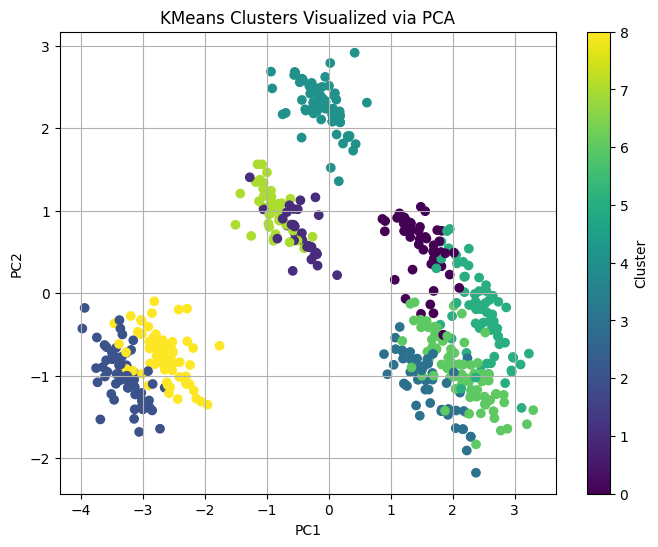

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=9, random_state=42)
pseudo_labels = kmeans.fit_predict(X_combined)

# Create a DataFrame for the combined data + labels
Augmented_data = pd.DataFrame(X_combined, columns=[f'feature_{i}' for i in range(X_combined.shape[1])])
Augmented_data['pseudo_label'] = pseudo_labels

# Apply PCA on the same combined data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pseudo_labels, cmap='viridis')
plt.title("KMeans Clusters Visualized via PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [ ]:
Augmented_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,pseudo_label
0,-0.200652,1.128275,0.652980,0.212721,-0.560469,0.590097,1.660343,4
1,1.819245,-1.659589,0.496720,-1.539329,1.244026,0.590097,0.650765,5
2,-0.200652,0.198987,0.652980,0.212721,-1.282267,0.590097,1.660343,4
3,0.809297,-0.420539,0.496720,-0.663304,1.965824,0.590097,-0.022286,6
4,-1.210601,1.128275,-1.690919,0.504730,-0.199570,-1.694637,-1.368390,2


In [ ]:
data.head()

,Number of Lanes,Number of Potholes,Lane Width (m),Traffic Congestion,Lighting Condition,Lane Marking,pseudo_label
0,1,9,3.75,6,3,1,3
1,3,0,3.50,0,8,1,5
2,1,6,3.75,6,1,1,3
3,2,4,3.50,3,10,1,8
4,0,9,0.00,7,4,0,0


In [ ]:
data.describe()

,Number of Lanes,Number of Potholes,Lane Width (m),Traffic Congestion,Lighting Condition,Lane Marking
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,1.198675,5.357616,2.705298,5.271523,4.552980,0.741722
std,0.991793,3.233636,1.602554,3.430242,2.775457,0.438414
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,3.000000,0.000000,2.000000,2.000000,0.000000
50%,1.000000,6.000000,3.500000,6.000000,4.000000,1.000000
75%,2.000000,8.000000,3.750000,8.000000,6.000000,1.000000
max,3.000000,10.000000,3.750000,10.000000,10.000000,1.000000


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your CSV
df = pd.read_csv("Generated_Clustering_Dataset.csv")

# Fill or fix invalid values (e.g., 0 lane width if needed)
df['Lane Width (m)'] = df['Lane Width (m)'].replace(0, df[df['Lane Width (m)'] > 0]['Lane Width (m)'].median())

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [ ]:
from sklearn.cluster import KMeans

# 9 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add to DataFrame
df['cluster'] = clusters

In [ ]:
# Count samples in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()
print(cluster_counts)

cluster
0    48
1    38
2    48
3    22
4    18
5    30
6    40
7    22
8    14
9    22
Name: count, dtype: int64


In [ ]:
# Sample 5 points from each cluster (without replacement)
sampled_points = df.groupby('cluster').apply(lambda x: x.sample(min(5, len(x)), random_state=42))

# Remove extra index level created by groupby
sampled_points.reset_index(drop=True, inplace=True)

# View or export
print(sampled_points)
sampled_points.to_csv("cluster_samples_for_labeling.csv", index=False)

    Number of Lanes  Number of Potholes  Lane Width (m)  Traffic Congestion  \
0                 0                  10            3.75                   7   
1                 0                   9            3.75                   9   
2                 0                   9            3.75                   9   
3                 0                   9            3.75                   8   
4                 0                   9            3.75                   8   
5                 2                   2            3.50                   4   
6                 2                   1            3.50                   1   
7                 3                   4            3.50                   1   
8                 3                   3            3.50                   2   
9                 2                   4            3.50                   0   
10                1                   8            3.75                  10   
11                1                  10            3

/tmp/ipython-input-57-2322786266.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_points = df.groupby('cluster').apply(lambda x: x.sample(min(5, len(x)), random_state=42))


In [ ]:
# Example mapping: cluster_id → manual_label (1-10)
cluster_to_label = {
    0: 1,
    1: 5,
    2: 3,
    3: 9,
    4: 2,
    5: 6,
    6: 8,
    7: 4,
    8: 7,
    9: 10
}

df['label'] = df['cluster'].map(cluster_to_label)

In [ ]:
import numpy as np

def augment_with_noise(X, y, n_copies=2, noise_std=0.05):
    X_augmented = [X]
    y_augmented = [y]
    for _ in range(n_copies):
        noise = np.random.normal(0, noise_std, X.shape)
        X_aug = X + noise
        X_augmented.append(X_aug)
        y_augmented.append(y)
    return np.vstack(X_augmented), np.hstack(y_augmented)

# Prepare for augmentation
features = df.drop(['cluster', 'label'], axis=1).values
labels = df['label'].values

X_aug, y_aug = augment_with_noise(features, labels, n_copies=3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_aug, y_aug, test_size=0.2, random_state=42, stratify=y_aug)

# Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      0.97      0.99        39
           2       1.00      0.93      0.96        14
           3       0.97      0.97      0.97        38
           4       1.00      1.00      1.00        18
           5       0.97      1.00      0.98        30
           6       0.96      1.00      0.98        24
           7       0.91      0.91      0.91        11
           8       0.97      0.97      0.97        32
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        18

    accuracy                           0.98       242
   macro avg       0.98      0.98      0.98       242
weighted avg       0.98      0.98      0.98       242



In [ ]:
final_df = df.drop('cluster', axis=1)
final_df.to_csv("road_data_with_manual_labels.csv", index=False)